In [57]:
#This case requires developing a customer segmentation to define marketing strategy. 
#The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. 
#The file is at a customer level with 18 behavioral variables.
#1. Load your dataset. 
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
df = pd.read_csv("CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


CUST_ID: Identification of Credit Cardholder (Categorical)

BALANCE: Balance amount left in their account to make purchases 

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 

PURCHASES: Amount of purchases made from the account.

ONEOFF_PURCHASES: Maximum purchase amount done in one go

INSTALLMENTS_PURCHASES: Amount of purchase done in installment

CASH_ADVANCE: Cash in advance given by the user

PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one go (1 = frequently purchased, 0 = not frequently purchased)

 PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY: How frequently the cash in advance is being paid 

CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" PURCHASES_TRX: Number of purchase transactions made

CREDIT_LIMIT: Limit of Credit Card for user 

PAYMENTS: Amount of Payment done by user

MINIMUM_PAYMENTS: Minimum amount of payments made by user 

PRCFULLPAYMENT: Percent of full payment paid by user

TENURE: Tenure of credit card service for user

In [58]:
df = df.drop('CUST_ID', axis=1)

In [59]:
df = MinMaxScaler().fit_transform(df) 
df = pd.DataFrame(df, columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [60]:
df.MINIMUM_PAYMENTS = df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean())
df.CREDIT_LIMIT = df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean())
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [62]:
#2. Use hierarchical clustering to identify the inherent groupings within your data.
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,1
3,0
4,0
...,...
8945,2
8946,2
8947,2
8948,0


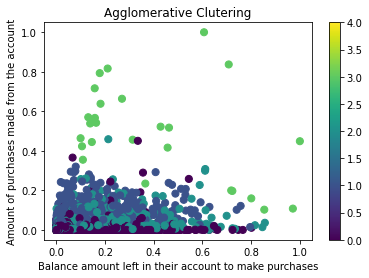

In [63]:
#3. Plot the clusters. 
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ["BALANCE"] , df ['PURCHASES'] ,  c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Balance amount left in their account to make purchases")
ax.set_ylabel("Amount of purchases made from the account")
plt.colorbar(scatter)

In [65]:
#4. Plot the dendrogram. Use k-means clustering. 
kmeans=KMeans(n_clusters=5, random_state=0) 
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,0
2,2
3,0
4,0
...,...
8945,3
8946,1
8947,1
8948,0


In [66]:
kmeans.predict(df)
print(kmeans.cluster_centers_) 

[[0.11463998 0.96872257 0.00557404 0.005503   0.00218695 0.03387335
  0.13118337 0.08112861 0.05015633 0.15148187 0.04398565 0.00709338
  0.13858268 0.02915688 0.0134394  0.02371338 0.91615399]
 [0.08377095 0.93010805 0.02442759 0.00932417 0.03637111 0.01502629
  0.88156445 0.13162183 0.83103862 0.06480071 0.02006597 0.06547982
  0.13674548 0.03132786 0.01586925 0.05681651 0.93522797]
 [0.10540983 0.97463592 0.05935273 0.05591784 0.02806006 0.01481427
  0.88268351 0.8121106  0.40652801 0.06465606 0.01909576 0.10808667
  0.21905499 0.05853146 0.01031057 0.18977607 0.957877  ]
 [0.00974162 0.91105318 0.03733529 0.01974258 0.0456453  0.00115034
  0.87314031 0.21618183 0.7945677  0.00687177 0.00213044 0.07302286
  0.14837704 0.03745083 0.00256888 0.81924445 0.88738739]
 [0.00907515 0.37753255 0.00688778 0.00601586 0.00412501 0.01164502
  0.18859426 0.0760279  0.10687863 0.03569783 0.00955909 0.00873739
  0.12829776 0.0276569  0.00375708 0.20951782 0.88552332]]


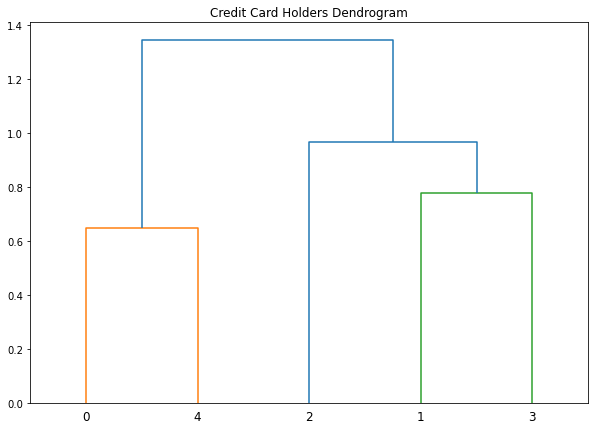

In [67]:
plt.figure(figsize=(10,7))
plt.title("Credit Card Holders Dendrogram")
dend=shc.dendrogram(shc.linkage(kmeans.cluster_centers_, method="complete"))

In [68]:
#5. Try different k values and select the best one. 
kmeans=KMeans(n_clusters=10, random_state=0) 
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,2
1,2
2,3
3,0
4,2
...,...
8945,9
8946,1
8947,8
8948,8


In [69]:
kmeans.predict(df)
print(kmeans.cluster_centers_) 

[[9.35231535e-03 3.32785156e-01 5.93371702e-03 5.86626148e-03
  2.30938477e-03 1.24874219e-02 1.32444329e-01 6.54936216e-02
  6.40491235e-02 3.49537625e-02 9.32474864e-03 6.15324262e-03
  1.27711046e-01 2.80492555e-02 4.26648393e-03 6.31079792e-02
  9.55570004e-01]
 [7.34510118e-02 9.23177163e-01 2.13610596e-02 5.67108658e-03
  3.62994294e-02 1.35276182e-02 9.53337741e-01 8.05851912e-02
  9.16429424e-01 5.75924665e-02 1.67530705e-02 6.39489476e-02
  1.21798337e-01 2.80872400e-02 1.64772049e-02 6.00240171e-02
  9.29505468e-01]
 [1.20685644e-01 9.76822208e-01 3.77309616e-03 4.13203295e-03
  7.42280959e-04 3.53488914e-02 7.29563946e-02 5.70350642e-02
  1.56226355e-02 1.56398397e-01 4.66703676e-02 4.10893445e-03
  1.41463394e-01 3.07389962e-02 1.45440672e-02 2.08063355e-02
  9.79136074e-01]
 [9.57628831e-02 9.73194838e-01 3.21427962e-02 3.61525189e-02
  4.58139634e-03 1.38984865e-02 7.43841268e-01 7.14597062e-01
  9.94624497e-02 6.80935640e-02 1.87264525e-02 5.46651451e-02
  1.67095057e-01

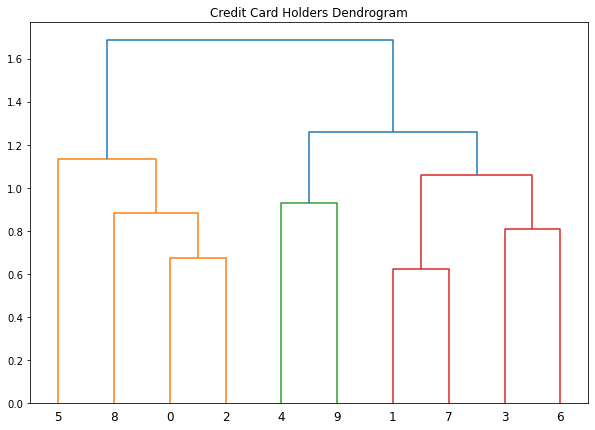

In [70]:
plt.figure(figsize=(10,7))
plt.title("Credit Card Holders Dendrogram")
dend=shc.dendrogram(shc.linkage(kmeans.cluster_centers_, method="complete"))

[[1.24676166e-01 9.89938282e-01 9.26216793e-02 7.36240922e-02
  6.84941023e-02 1.51297083e-02 9.79805598e-01 8.10244061e-01
  8.59369943e-01 6.31009276e-02 2.16473015e-02 1.79121525e-01
  2.55871797e-01 8.70705525e-02 1.17950979e-02 2.67773571e-01
  9.78182636e-01]
 [7.05737589e-02 7.63449457e-01 5.85083258e-03 5.91842388e-03
  2.05501377e-03 3.88748200e-02 1.87043310e-01 1.09896023e-01
  7.13219876e-02 1.83747631e-01 4.26325338e-02 7.36991551e-03
  1.03836591e-01 1.64001333e-02 6.45965559e-03 6.22942025e-02
  2.22107438e-01]
 [7.98473748e-03 3.68983361e-01 7.00144572e-03 6.03034997e-03
  4.34803919e-03 1.06458509e-02 1.88805390e-01 7.31615475e-02
  1.10887946e-01 2.94384193e-02 8.23249512e-03 8.99159846e-03
  1.32607533e-01 2.88431078e-02 3.63996928e-03 2.18430410e-01
  9.63824289e-01]
 [7.88449498e-02 9.27307733e-01 2.12607120e-02 6.88384349e-03
  3.38856125e-02 1.45201819e-02 8.72302538e-01 1.01781447e-01
  8.20008370e-01 6.25054667e-02 1.90301099e-02 5.84416496e-02
  1.30151940e-01

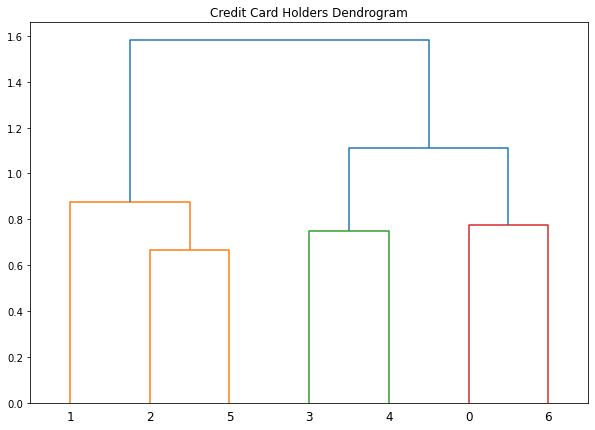

In [71]:
kmeans=KMeans(n_clusters=7, random_state=0) 
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels
kmeans.predict(df)
print(kmeans.cluster_centers_) 
plt.figure(figsize=(10,7))
plt.title("Credit Card Holders Dendrogram")
dend=shc.dendrogram(shc.linkage(kmeans.cluster_centers_, method="complete"))

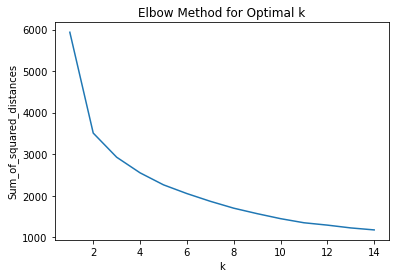

In [72]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

[[0.10018244 0.97459061 0.06624027 0.05950885 0.03656619 0.01380008
  0.90139895 0.80579661 0.49125553 0.0614623  0.0187363  0.11998821
  0.22433007 0.06443494 0.01007506 0.27641278 0.95851165]
 [0.11472509 0.96624286 0.00595481 0.00580422 0.002471   0.03392172
  0.13654917 0.08705372 0.05002237 0.15004183 0.04376742 0.0075409
  0.13933995 0.02934524 0.01342344 0.02298262 0.91568466]
 [0.00804784 0.38056699 0.00714501 0.00577906 0.00511427 0.01077493
  0.20899516 0.07389689 0.12702338 0.03390676 0.00929056 0.00950689
  0.1279217  0.02739887 0.00367164 0.24670275 0.88641364]
 [0.06194229 0.92970956 0.02226754 0.00687272 0.03611187 0.01104286
  0.88325494 0.10236225 0.83233717 0.0489738  0.01457484 0.05972581
  0.13030802 0.02798432 0.01253108 0.22528771 0.91942687]]


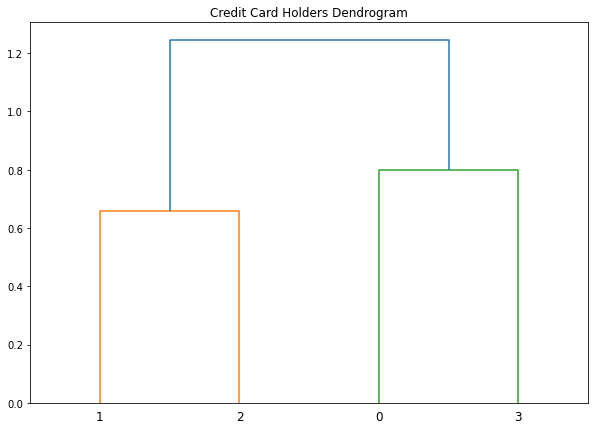

In [75]:
kmeans=KMeans(n_clusters=4, random_state=0) 
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels
kmeans.predict(df)
print(kmeans.cluster_centers_) 
plt.figure(figsize=(10,7))
plt.title("Credit Card Holders Dendrogram")
dend=shc.dendrogram(shc.linkage(kmeans.cluster_centers_, method="complete"))

The elbow method shows us that 4 is the optimal K value for this dataset. When we compare the dendograms of K = 5 and K = 4, then we see that K = 5 produces only 1 extra level of clustering in the dendogram. 